# Random forest

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Load the data
X_train = np.load("data/regression_data/X_train_batch1.npy")
y_train = np.load('data/regression_data/y1_train_batch1.npy')
X_val = np.load("data/regression_data/X_val_batch1.npy")
y_val = np.load('data/regression_data/y1_val_batch1.npy')
X_test = np.load("data/regression_data/X_test_batch1.npy")
y_test = np.load('data/regression_data/y1_test_batch1.npy')

### Random forest

1. Simple random forest only using training set and test set

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model1 = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model
rf_model1.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model1.predict(X_test)

# Calculate and print MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")

Test MSE: 0.19536950497646335
Test R²: 0.1519634176573854


In [21]:
y_val_pred = rf_model1.predict(X_val)
mse_val = mean_squared_error(y_val,y_val_pred)
r2_val = r2_score(y_val,y_val_pred)

print(f"Val MSE: {mse_val}")
print(f"Val R²: {r2_val}")

Val MSE: 0.215901940893993
Val R²: 0.15305320687448565


In [22]:
y_train_pred = rf_model1.predict(X_train)
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)

print(f"Val MSE: {mse_train}")
print(f"Val R²: {r2_train}")

Val MSE: 0.20315910443013607
Val R²: 0.2273427881906912


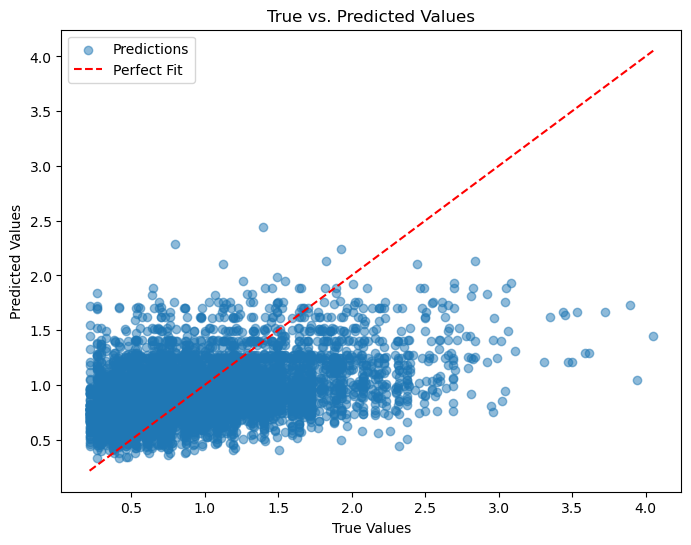

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Predictions")
plt.plot([min(y_val), max(y_val)], 
         [min(y_val), max(y_val)], 
         color='red', linestyle="--", label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()
plt.show()

In [25]:
importances = rf_model1.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([10, 64, 34, 66, 59, 58, 51, 52, 14, 32, 55, 36, 56, 42, 65, 35, 60,
       33, 44, 31,  9, 23,  8, 27, 53, 20, 49, 29,  3, 28, 46, 12, 11,  1,
        0,  7, 24, 45, 18, 25, 40, 30, 26, 19, 50, 48, 47,  6, 57, 43, 61,
       16,  4, 15, 62, 17,  2, 13, 21, 38, 37, 54,  5, 22, 41, 39, 63])

2. Random forest (2nd try)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with cross-validation and validation set
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training set, using the validation set for tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Now, you can evaluate on the validation set if needed
y_val_pred = best_rf_model.predict(X_val)

3. Random Forest with hyperparameter tuning using validation Set

In [ ]:
print("\n### Running Manual Hyperparameter Tuning Using Validation Set for Random Forest ###")

# Define hyperparameter candidates
n_estimators = [100, 200, 300, 500]
max_depth = [5, 10, 20, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

best_n_estimators = None
best_max_depth = None
best_min_samples_split = None
best_min_samples_leaf = None
best_mse = float("inf")
MSE = []
R2 = []

# Loop through all hyperparameter combinations
for n in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                model = RandomForestRegressor(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=split,
                    min_samples_leaf=leaf,
                    random_state=42
                )
                model.fit(X_train, y_train)
                val_pred = model.predict(X_val)
                mse = mean_squared_error(y_val, val_pred)
                rsquared = r2_score(y_val, val_pred)
                MSE.append(mse)
                R2.append(rsquared)
                
                # Store best model
                if mse < best_mse:
                    best_mse = mse
                    best_n_estimators = n
                    best_max_depth = depth
                    best_min_samples_split = split
                    best_min_samples_leaf = leaf

print(f"Best n_estimators (Validation Set): {best_n_estimators}")
print(f"Best max_depth (Validation Set): {best_max_depth}")
print(f"Best min_samples_split (Validation Set): {best_min_samples_split}")
print(f"Best min_samples_leaf (Validation Set): {best_min_samples_leaf}")
print(f"Best Validation MSE (Manual Search): {best_mse}")

# Train final model with best hyperparameters from validation set
final_model_rf = RandomForestRegressor(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42
)
final_model_rf.fit(X_train, y_train)

# Evaluate final model on test set
test_pred_rf = final_model_rf.predict(X_test)
test_mse_rf = mean_squared_error(y_test, test_pred_rf)
test_r2_rf = r2_score(y_test, test_pred_rf)

print("Test MSE (Manual Search with Random Forest):", test_mse_rf)
print("Test R2 Score (Manual Search with Random Forest):", test_r2_rf)

In [13]:
train_pred_rf = final_model_rf.predict(X_train)
train_mse_rf = mean_squared_error(y_train, train_pred_rf)
train_r2_rf = r2_score(y_train, train_pred_rf)
print(train_r2_rf)
print(train_mse_rf)

0.20028978762412475
0.21072677951292806


In [15]:
val_pred_rf = final_model_rf.predict(X_val)
val_mse_rf = mean_squared_error(y_val, val_pred_rf)
val_r2_rf = r2_score(y_val, val_pred_rf)
print(val_mse_rf)
print(val_r2_rf)


0.20897156577162904
0.17804271253845716


Random forest batch 2

In [7]:
# Load the data
X_train = np.load("data/regression_data/X_train_batch2.npy")
y_train = np.load('data/regression_data/y1_train_batch2.npy')
X_val = np.load("data/regression_data/X_val_batch2.npy")
y_val = np.load('data/regression_data/y1_val_batch2.npy')
X_test = np.load("data/regression_data/X_test_batch2.npy")
y_test = np.load('data/regression_data/y1_test_batch2.npy')

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")

Test MSE: 0.36399299105416605
Test R²: 0.05815066731707352


In [9]:
y_val_pred = rf_model.predict(X_val)
mse_val = mean_squared_error(y_val,y_val_pred)
r2_val = r2_score(y_val,y_val_pred)

print(f"Val MSE: {mse_val}")
print(f"Val R²: {r2_val}")

Val MSE: 0.37293181755402294
Val R²: 0.032331547496983304


In [10]:
y_train_pred = rf_model.predict(X_train)
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)

print(f"Val MSE: {mse_train}")
print(f"Val R²: {r2_train}")

Val MSE: 0.3007717707771885
Val R²: 0.21274694854014942


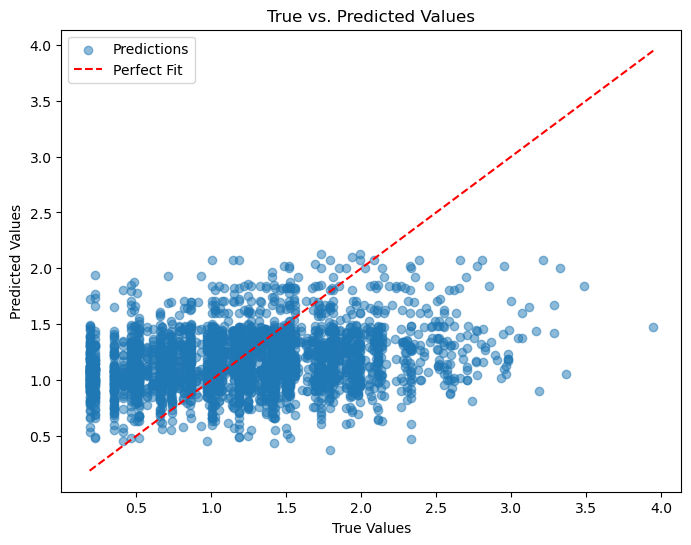

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Predictions")
plt.plot([min(y_val), max(y_val)], 
         [min(y_val), max(y_val)], 
         color='red', linestyle="--", label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()
plt.show()

In [12]:
importances = rf_model.feature_importances_

In [13]:
importances

array([0.01273051, 0.00882104, 0.00922316, 0.00741546, 0.0102313 ,
       0.0096001 , 0.00726845, 0.00843562, 0.01039471, 0.00910059,
       0.01189357, 0.0094627 , 0.00781988, 0.01142569, 0.03122081,
       0.01107723, 0.00739998, 0.00810859, 0.01024017, 0.03535361,
       0.00917666, 0.00897817, 0.00851284, 0.00760726, 0.00790674,
       0.00782676, 0.00816322, 0.00767336, 0.01391564, 0.01783732,
       0.01808004, 0.01129992, 0.0113489 , 0.01020271, 0.01634853,
       0.01141095, 0.01139164, 0.00729984, 0.00772998, 0.01184116,
       0.01211735, 0.00743585, 0.02044278, 0.02375978, 0.01148997,
       0.01043346, 0.00973033, 0.00782303, 0.04481053, 0.01722214,
       0.01518808, 0.00783809, 0.01347126, 0.05544376, 0.00919758,
       0.01437095, 0.01756425, 0.02356264, 0.01302553, 0.01344559,
       0.01781475, 0.02001355, 0.01280521, 0.01480889, 0.06078708,
       0.02312468, 0.05049806])

In [15]:
indices = np.argsort(importances)[::-1]
indices

array([64, 53, 66, 48, 19, 14, 43, 57, 65, 42, 61, 30, 29, 60, 56, 49, 34,
       50, 63, 55, 28, 52, 59, 58, 62,  0, 40, 10, 39, 44, 13, 35, 36, 32,
       31, 15, 45,  8, 18,  4, 33, 46,  5, 11,  2, 54, 20,  9, 21,  1, 22,
        7, 26, 17, 24, 51, 25, 47, 12, 38, 27, 23, 41,  3, 16, 37,  6])

# With new training sets

In [27]:
X_train = np.load("data/regression_data/X_train_batch1_sub.npy")
y_train = np.load('data/regression_data/y1_train_batch1_sub.npy')
X_val = np.load("data/regression_data/X_val_batch1.npy")
y_val = np.load('data/regression_data/y1_val_batch1.npy')
X_test = np.load("data/regression_data/X_test_batch1.npy")
y_test = np.load('data/regression_data/y1_test_batch1.npy')

In [28]:
# Initialize the Random Forest Regressor
rf_model3 = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model
rf_model3.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model3.predict(X_test)

# Calculate and print MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")

Test MSE: 0.20268856387820228
Test R²: 0.12019372208620238


In [29]:
y_val_pred = rf_model3.predict(X_val)
mse_val = mean_squared_error(y_val,y_val_pred)
r2_val = r2_score(y_val,y_val_pred)

print(f"Val MSE: {mse_val}")
print(f"Val R²: {r2_val}")

Val MSE: 0.21846166335101105
Val R²: 0.1430118486667461


In [30]:
y_train_pred = rf_model3.predict(X_train)
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)

print(f"Val MSE: {mse_train}")
print(f"Val R²: {r2_train}")

Val MSE: 0.21063053031777296
Val R²: 0.23446125981629096


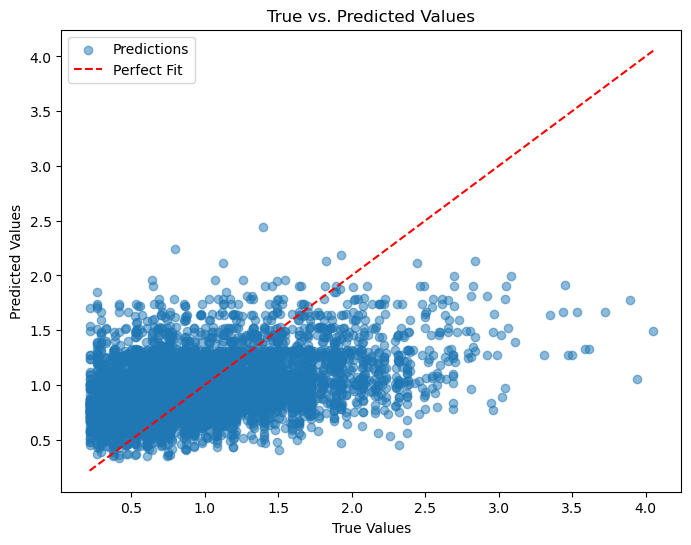

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Predictions")
plt.plot([min(y_val), max(y_val)], 
         [min(y_val), max(y_val)], 
         color='red', linestyle="--", label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()
plt.show()

In [32]:
importances = rf_model1.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([10, 64, 34, 66, 59, 58, 51, 52, 14, 32, 55, 36, 56, 42, 65, 35, 60,
       33, 44, 31,  9, 23,  8, 27, 53, 20, 49, 29,  3, 28, 46, 12, 11,  1,
        0,  7, 24, 45, 18, 25, 40, 30, 26, 19, 50, 48, 47,  6, 57, 43, 61,
       16,  4, 15, 62, 17,  2, 13, 21, 38, 37, 54,  5, 22, 41, 39, 63])

# Random Forest with GridSearchCV on batch 1 undersampled

In [3]:
X_train = np.load("data/regression_data/X_train_batch1_sub.npy")
y_train = np.load('data/regression_data/y1_train_batch1_sub.npy')
X_val = np.load("data/regression_data/X_val_batch1.npy")
y_val = np.load('data/regression_data/y1_val_batch1.npy')
X_test = np.load("data/regression_data/X_test_batch1.npy")
y_test = np.load('data/regression_data/y1_test_batch1.npy')

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6]
}

# Initialize GridSearchCV with cross-validation and validation set
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training set, using the validation set for tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_

# Now, you can evaluate on the validation set if needed
y_val_pred = best_rf_model.predict(X_val)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  27.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  27.7s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  28.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  28.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  28.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  29.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  29.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  30.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  32.1s
[CV] END max_depth=5, min_samples_lea

In [6]:
mse_val = mean_squared_error(y_val,y_val_pred)
r2_val = r2_score(y_val,y_val_pred)

print(f"Val MSE: {mse_val}")
print(f"Val R²: {r2_val}")

Val MSE: 0.21084762735927812
Val R²: 0.17288042390621905


In [8]:
y_test_pred = best_rf_model.predict(X_test)
mse_test = mean_squared_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

Test MSE: 0.1948453079851004
Test R²: 0.15423878926711154


# Random Forest with GridSearchCV on Batch 2 undersampled

In [2]:
X_train = np.load("data/regression_data/X_train_batch2_sub.npy")
y_train = np.load('data/regression_data/y1_train_batch2_sub.npy')
X_val = np.load("data/regression_data/X_val_batch2.npy")
y_val = np.load('data/regression_data/y1_val_batch2.npy')
X_test = np.load("data/regression_data/X_test_batch2.npy")
y_test = np.load('data/regression_data/y1_test_batch2.npy')

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6]
}

# Initialize GridSearchCV with cross-validation and validation set
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training set, using the validation set for tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model with the best hyperparameters
best_rf_model_2 = grid_search.best_estimator_

# Now, you can evaluate on the validation set if needed
y_val_pred = best_rf_model_2.predict(X_val)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.6s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.9s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   8.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   8.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   8.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   8.6s
[CV] END max_depth=5, min_samples_lea

In [4]:
mse_val = mean_squared_error(y_val,y_val_pred)
r2_val = r2_score(y_val,y_val_pred)

print(f"Val MSE: {mse_val}")
print(f"Val R²: {r2_val}")

Val MSE: 0.37690414209290724
Val R²: 0.022024319852549157


In [5]:
y_test_pred = best_rf_model_2.predict(X_test)
mse_test = mean_squared_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

Test MSE: 0.3423307244005018
Test R²: 0.114202821873855


# Random forest with GridSearchCV on batch 1

In [6]:
# Load the data
X_train = np.load("data/regression_data/X_train_batch1.npy")
y_train = np.load('data/regression_data/y1_train_batch1.npy')
X_val = np.load("data/regression_data/X_val_batch1.npy")
y_val = np.load('data/regression_data/y1_val_batch1.npy')
X_test = np.load("data/regression_data/X_test_batch1.npy")
y_test = np.load('data/regression_data/y1_test_batch1.npy')

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6]
}

# Initialize GridSearchCV with cross-validation and validation set
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model on the training set, using the validation set for tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best parameters found: {grid_search.best_params_}")

# Train the model with the best hyperparameters
best_rf_model_1 = grid_search.best_estimator_

# Now, you can evaluate on the validation set if needed
y_val_pred = best_rf_model_1.predict(X_val)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  28.9s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  29.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  30.1s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  29.6s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  30.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  30.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  30.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=  32.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  32.8s
[CV] END max_depth=5, min_samples_lea

In [10]:
y_test_pred = best_rf_model_1.predict(X_test)
mse_test = mean_squared_error(y_test,y_test_pred)
r2_test = r2_score(y_test,y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

Test MSE: 0.1884796750524651
Test R²: 0.18186996741484762


In [11]:
mse_val = mean_squared_error(y_val,y_val_pred)
r2_val = r2_score(y_val,y_val_pred)

print(f"Val MSE: {mse_val}")
print(f"Val R²: {r2_val}")

Val MSE: 0.209574808315347
Val R²: 0.17787347771121387


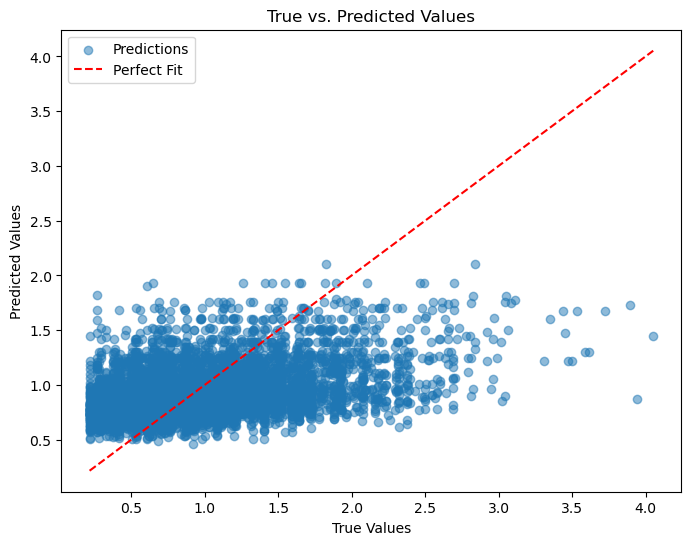

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Predictions")
plt.plot([min(y_val), max(y_val)], 
         [min(y_val), max(y_val)], 
         color='red', linestyle="--", label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values Batch 1")
plt.legend()
plt.show()

# Random forest with GridSearchCV with batch 2 

In [ ]:
# Load the data
X_train = np.load("data/regression_data/X_train_batch2.npy")
y_train = np.load('data/regression_data/y1_train_batch2.npy')
X_val = np.load("data/regression_data/X_val_batch2.npy")
y_val = np.load('data/regression_data/y1_val_batch2.npy')
X_test = np.load("data/regression_data/X_test_batch2.npy")
y_test = np.load('data/regression_data/y1_test_batch2.npy')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model4 = RandomForestRegressor(n_estimators=300, random_state=42)

# Train the model
rf_model4.fit(X_train, y_train)

# Predict on the test set
y_val_pred = rf_model4.predict(X_test)

# Calculate and print MSE and R²
mse = mean_squared_error(y_test, y_val_pred)
r2 = r2_score(y_test, y_val_pred)

print(f"Val MSE: {mse}")
print(f"Val R²: {r2}")